In [1]:
import pandas as pd

## BUILDING THE MODEL

In [2]:
Final_DF = pd.read_csv('Final_DF.csv')

In [3]:
Final_DF.head()

,Date,Dollar_Index,Gold_Price,Interest_Rate,US_10_Year,VIX_Value,BTC_Price,ETH_Price,SOL_Price,XRP_Price
0,2020-04-10,99.519997,1662.50,0.05,0.729,41.67,6865.493164,158.412445,0.951054,0.187464
1,2020-04-11,99.519997,1662.50,0.05,0.729,41.67,6859.083008,158.216019,0.776819,0.188063
2,2020-04-12,99.519997,1662.50,0.05,0.729,41.67,6971.091797,161.142426,0.882507,0.190135
3,2020-04-13,99.349998,1662.50,0.05,0.770,41.17,6845.037598,156.279556,0.777832,0.187732
4,2020-04-14,98.889999,1715.85,0.05,0.750,37.76,6842.427734,157.596390,0.661925,0.185335


In [4]:
# Convert date column to datetime
Final_DF['Date'] = pd.to_datetime(Final_DF['Date'])

In [5]:
# add time index
Final_DF["time_idx"] = Final_DF["Date"].dt.year * 12 + Final_DF["Date"].dt.month + Final_DF["Date"].dt.day
Final_DF["time_idx"] -= Final_DF["time_idx"].min()

In [6]:
Final_DF.head(10)

,Date,Dollar_Index,Gold_Price,Interest_Rate,US_10_Year,VIX_Value,BTC_Price,ETH_Price,SOL_Price,XRP_Price,time_idx
0,2020-04-10,99.519997,1662.50,0.05,0.729,41.67,6865.493164,158.412445,0.951054,0.187464,8
1,2020-04-11,99.519997,1662.50,0.05,0.729,41.67,6859.083008,158.216019,0.776819,0.188063,9
2,2020-04-12,99.519997,1662.50,0.05,0.729,41.67,6971.091797,161.142426,0.882507,0.190135,10
3,2020-04-13,99.349998,1662.50,0.05,0.770,41.17,6845.037598,156.279556,0.777832,0.187732,11
4,2020-04-14,98.889999,1715.85,0.05,0.750,37.76,6842.427734,157.596390,0.661925,0.185335,12
5,2020-04-15,99.459999,1712.25,0.05,0.635,40.84,6642.109863,153.286896,0.646651,0.181270,13
6,2020-04-16,100.029999,1717.85,0.05,0.617,40.11,7116.804199,172.157379,0.690816,0.190104,14
7,2020-04-17,99.779999,1693.15,0.05,0.642,38.15,7096.184570,171.638580,0.660728,0.190202,15
8,2020-04-18,99.779999,1693.15,0.05,0.642,38.15,7257.665039,186.914001,0.681096,0.194925,16
9,2020-04-19,99.779999,1693.15,0.05,0.642,38.15,7189.424805,181.614960,0.606969,0.190859,17


In [7]:
# Reshape the data into long format
Final_DF = Final_DF.melt(
    id_vars=['Date', 'Dollar_Index', 'Gold_Price', 'Interest_Rate', 'US_10_Year', 'VIX_Value', 'time_idx'], 
    value_vars=['BTC_Price', 'ETH_Price', 'SOL_Price', 'XRP_Price'],
    var_name='group_id', 
    value_name='target'
)

# Map group_id to a standard format (optional)
Final_DF['group_id'] = Final_DF['group_id'].str.replace('_Price', '')

# Sort by date and group_id
Final_DF = Final_DF.sort_values(by=['Date', 'group_id']).reset_index(drop=True)

# Display the transformed data
print(Final_DF.head())

        Date  Dollar_Index  Gold_Price  Interest_Rate  US_10_Year  VIX_Value  \
0 2020-04-10     99.519997      1662.5           0.05       0.729      41.67   
1 2020-04-10     99.519997      1662.5           0.05       0.729      41.67   
2 2020-04-10     99.519997      1662.5           0.05       0.729      41.67   
3 2020-04-10     99.519997      1662.5           0.05       0.729      41.67   
4 2020-04-11     99.519997      1662.5           0.05       0.729      41.67   

   time_idx group_id       target  
0         8      BTC  6865.493164  
1         8      ETH   158.412445  
2         8      SOL     0.951054  
3         8      XRP     0.187464  
4         9      BTC  6859.083008  


In [8]:
Final_DF.head(40)

,Date,Dollar_Index,Gold_Price,Interest_Rate,US_10_Year,VIX_Value,time_idx,group_id,target
0,2020-04-10,99.519997,1662.50,0.05,0.729,41.67,8,BTC,6865.493164
1,2020-04-10,99.519997,1662.50,0.05,0.729,41.67,8,ETH,158.412445
2,2020-04-10,99.519997,1662.50,0.05,0.729,41.67,8,SOL,0.951054
3,2020-04-10,99.519997,1662.50,0.05,0.729,41.67,8,XRP,0.187464
4,2020-04-11,99.519997,1662.50,0.05,0.729,41.67,9,BTC,6859.083008
5,2020-04-11,99.519997,1662.50,0.05,0.729,41.67,9,ETH,158.216019
6,2020-04-11,99.519997,1662.50,0.05,0.729,41.67,9,SOL,0.776819
7,2020-04-11,99.519997,1662.50,0.05,0.729,41.67,9,XRP,0.188063
8,2020-04-12,99.519997,1662.50,0.05,0.729,41.67,10,BTC,6971.091797
9,2020-04-12,99.519997,1662.50,0.05,0.729,41.67,10,ETH,161.142426


In [9]:
# # add time index
# Final_DF["time_idx"] = Final_DF["Date"].dt.year * 12 + Final_DF["Date"].dt.month
# Final_DF["time_idx"] -= Final_DF["time_idx"].min()

In [10]:
# Final_DF.head(60)

In [11]:
# add lag features
# Define the number of lags
# lag_days = [1, 3, 7]

# # Add lag features grouped by 'group_id'
# for lag in lag_days:
#     Final_DF[f'lag_{lag}'] = Final_DF.groupby('group_id')['target'].shift(lag)

In [12]:
Final_DF.head()

,Date,Dollar_Index,Gold_Price,Interest_Rate,US_10_Year,VIX_Value,time_idx,group_id,target
0,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,BTC,6865.493164
1,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,ETH,158.412445
2,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,SOL,0.951054
3,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,XRP,0.187464
4,2020-04-11,99.519997,1662.5,0.05,0.729,41.67,9,BTC,6859.083008


In [13]:
# Define rolling window sizes
# window_sizes = [3, 7]

# # Add rolling averages for each group
# for window in window_sizes:
#     Final_DF[f'ma_{window}'] = Final_DF.groupby('group_id')['target'].rolling(window=window).mean().reset_index(0, drop=True)


In [14]:
Final_DF.head()

,Date,Dollar_Index,Gold_Price,Interest_Rate,US_10_Year,VIX_Value,time_idx,group_id,target
0,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,BTC,6865.493164
1,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,ETH,158.412445
2,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,SOL,0.951054
3,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,XRP,0.187464
4,2020-04-11,99.519997,1662.5,0.05,0.729,41.67,9,BTC,6859.083008


In [15]:
# import necessary libraries
import copy
from pathlib import Path
import warnings

import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor
from lightning.pytorch.loggers import TensorBoardLogger
import numpy as np
import pandas as pd
import torch

from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import MAE, SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters
from pytorch_forecasting.data.encoders import NaNLabelEncoder

c:\Users\Sathmika\anaconda3\envs\tft\Lib\site-packages\pytorch_forecasting\models\base_model.py:27: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [16]:
Final_DF["month"] = Final_DF.Date.dt.month.astype(str).astype("category")  # categories have be strings
Final_DF["day_of_week"] = Final_DF.Date.dt.dayofweek.astype(str).astype("category")  # categories have be strings
Final_DF["year"] = Final_DF.Date.dt.year.astype(str).astype("category")  # categories have be strings
Final_DF["day_of_year"] = Final_DF.Date.dt.dayofyear.astype(str).astype("category")  # categories have be strings
Final_DF["quarter"] = Final_DF.Date.dt.quarter.astype(str).astype("category")  # categories have be strings

In [17]:
Final_DF.head()

,Date,Dollar_Index,Gold_Price,Interest_Rate,US_10_Year,VIX_Value,time_idx,group_id,target,month,day_of_week,year,day_of_year,quarter
0,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,BTC,6865.493164,4,4,2020,101,2
1,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,ETH,158.412445,4,4,2020,101,2
2,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,SOL,0.951054,4,4,2020,101,2
3,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,XRP,0.187464,4,4,2020,101,2
4,2020-04-11,99.519997,1662.5,0.05,0.729,41.67,9,BTC,6859.083008,4,5,2020,102,2


In [18]:
Final_DF.isna().sum()

Date             0
Dollar_Index     0
Gold_Price       0
Interest_Rate    0
US_10_Year       0
VIX_Value        0
time_idx         0
group_id         0
target           0
month            0
day_of_week      0
year             0
day_of_year      0
quarter          0
dtype: int64

In [19]:
Final_DF.head()

,Date,Dollar_Index,Gold_Price,Interest_Rate,US_10_Year,VIX_Value,time_idx,group_id,target,month,day_of_week,year,day_of_year,quarter
0,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,BTC,6865.493164,4,4,2020,101,2
1,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,ETH,158.412445,4,4,2020,101,2
2,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,SOL,0.951054,4,4,2020,101,2
3,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,XRP,0.187464,4,4,2020,101,2
4,2020-04-11,99.519997,1662.5,0.05,0.729,41.67,9,BTC,6859.083008,4,5,2020,102,2


In [20]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaled_features = ['Dollar_Index', 'Gold_Price', 'Interest_Rate', 'US_10_Year', 'VIX_Value', 'target']

# # Apply scaling per group_id
# def scale_group(group):
#     group[scaled_features] = scaler.fit_transform(group[scaled_features]) 
#     return group

# Final_DF = Final_DF.groupby('group_id', group_keys=False).apply(scale_group)


In [21]:
Final_DF.head()

,Date,Dollar_Index,Gold_Price,Interest_Rate,US_10_Year,VIX_Value,time_idx,group_id,target,month,day_of_week,year,day_of_year,quarter
0,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,BTC,6865.493164,4,4,2020,101,2
1,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,ETH,158.412445,4,4,2020,101,2
2,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,SOL,0.951054,4,4,2020,101,2
3,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,XRP,0.187464,4,4,2020,101,2
4,2020-04-11,99.519997,1662.5,0.05,0.729,41.67,9,BTC,6859.083008,4,5,2020,102,2


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

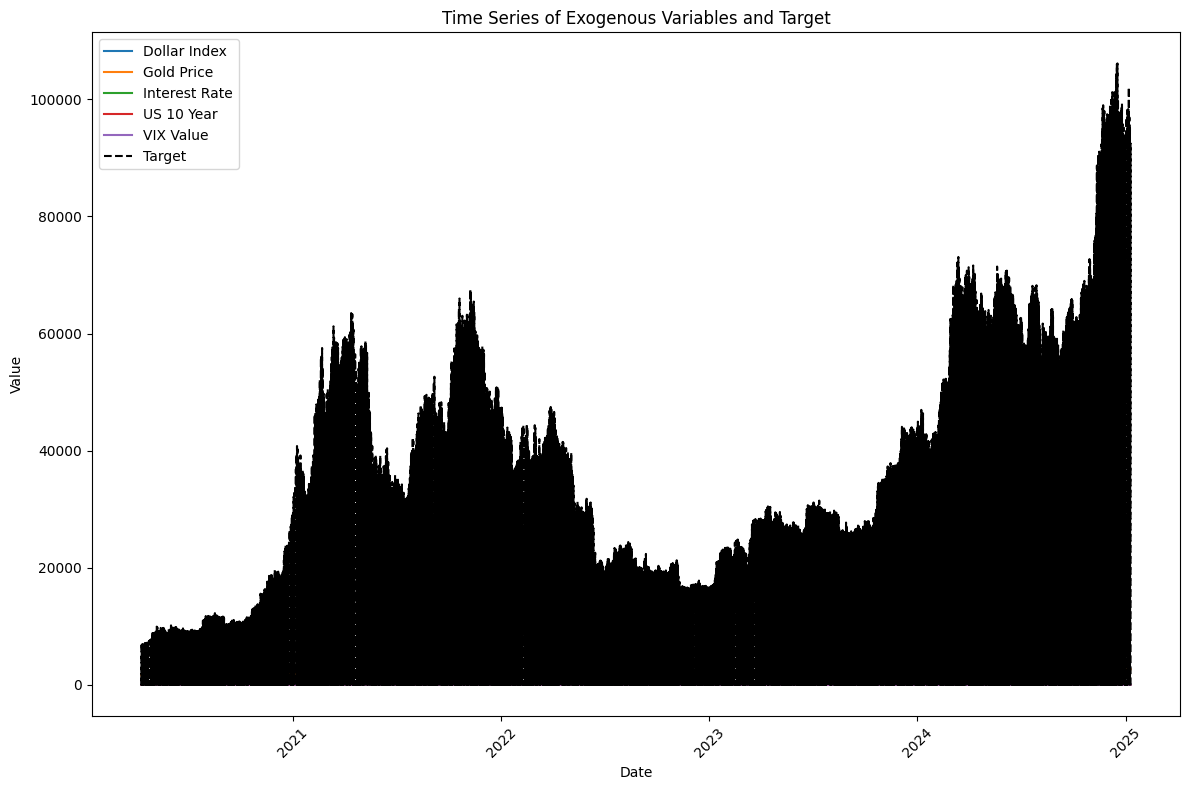

In [23]:
# 1. Time Series Plot
plt.figure(figsize=(12, 8))
plt.plot(Final_DF['Date'], Final_DF['Dollar_Index'], label='Dollar Index')
plt.plot(Final_DF['Date'], Final_DF['Gold_Price'], label='Gold Price')
plt.plot(Final_DF['Date'], Final_DF['Interest_Rate'], label='Interest Rate')
plt.plot(Final_DF['Date'], Final_DF['US_10_Year'], label='US 10 Year')
plt.plot(Final_DF['Date'], Final_DF['VIX_Value'], label='VIX Value')
plt.plot(Final_DF['Date'], Final_DF['target'], label='Target', linestyle='--', color='black')

plt.title('Time Series of Exogenous Variables and Target')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

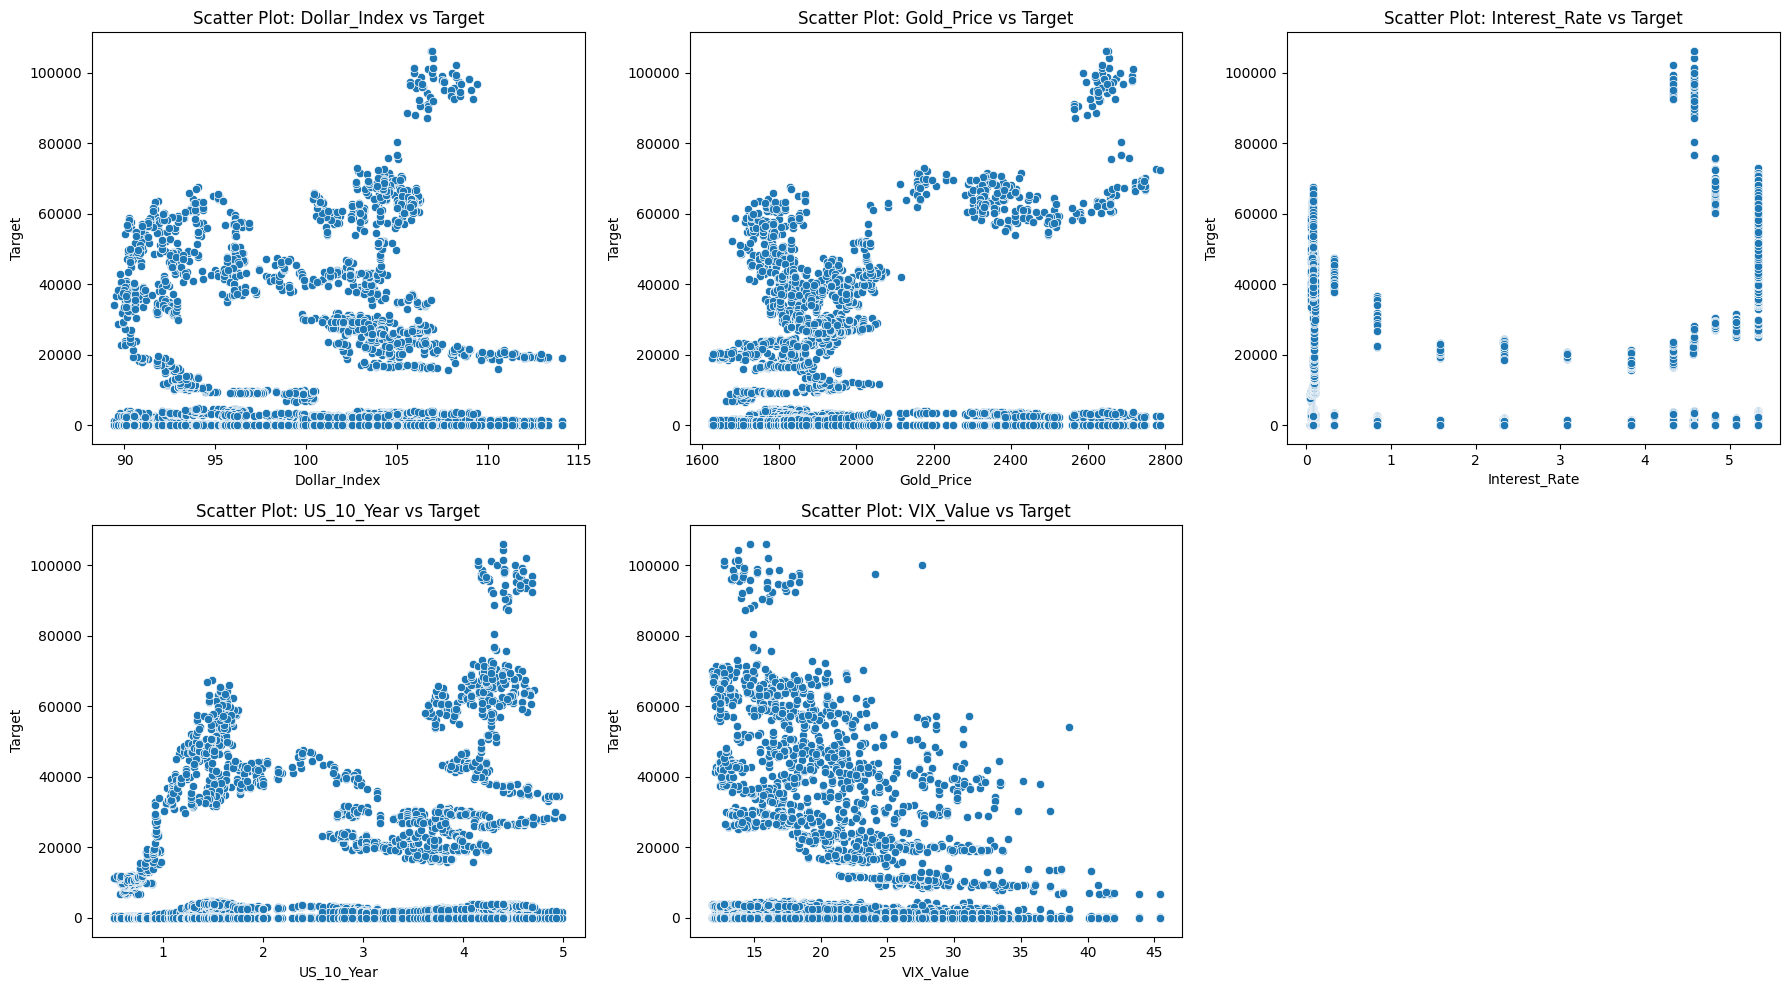

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

exogenous_vars = ['Dollar_Index', 'Gold_Price', 'Interest_Rate', 'US_10_Year', 'VIX_Value']
for i, var in enumerate(exogenous_vars):
    sns.scatterplot(x=Final_DF[var], y=Final_DF['target'], ax=axes[i])
    axes[i].set_title(f'Scatter Plot: {var} vs Target')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Target')

# Remove the last subplot axis (since we only have 5 exogenous variables)
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

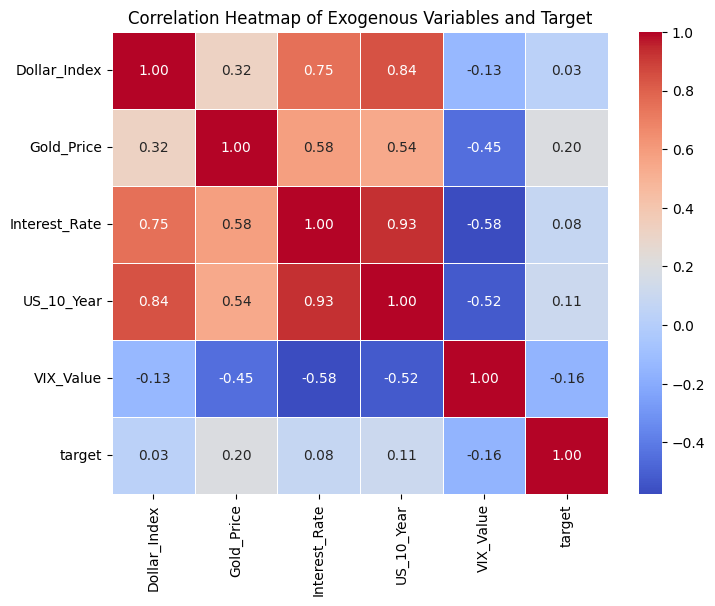

In [25]:
# Calculate correlation between all numerical variables
correlation_matrix = Final_DF[['Dollar_Index', 'Gold_Price', 'Interest_Rate', 'US_10_Year', 'VIX_Value', 'target']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Exogenous Variables and Target')
plt.show()

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [27]:
# Select only the exogenous variables (independent variables)
exogenous_vars = ['Dollar_Index', 'Gold_Price', 'Interest_Rate', 'US_10_Year', 'VIX_Value']

# Add a constant to the exogenous variables for the intercept in the VIF calculation
X = Final_DF[exogenous_vars]
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


In [28]:
vif_data

,Variable,VIF
0,const,1488.335070
1,Dollar_Index,6.810643
2,Gold_Price,1.642769
3,Interest_Rate,8.575063
4,US_10_Year,15.150783
5,VIX_Value,2.697086


In [29]:
Final_DF.head()

,Date,Dollar_Index,Gold_Price,Interest_Rate,US_10_Year,VIX_Value,time_idx,group_id,target,month,day_of_week,year,day_of_year,quarter
0,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,BTC,6865.493164,4,4,2020,101,2
1,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,ETH,158.412445,4,4,2020,101,2
2,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,SOL,0.951054,4,4,2020,101,2
3,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,XRP,0.187464,4,4,2020,101,2
4,2020-04-11,99.519997,1662.5,0.05,0.729,41.67,9,BTC,6859.083008,4,5,2020,102,2


In [30]:
Final_DF.head(10)

,Date,Dollar_Index,Gold_Price,Interest_Rate,US_10_Year,VIX_Value,time_idx,group_id,target,month,day_of_week,year,day_of_year,quarter
0,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,BTC,6865.493164,4,4,2020,101,2
1,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,ETH,158.412445,4,4,2020,101,2
2,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,SOL,0.951054,4,4,2020,101,2
3,2020-04-10,99.519997,1662.5,0.05,0.729,41.67,8,XRP,0.187464,4,4,2020,101,2
4,2020-04-11,99.519997,1662.5,0.05,0.729,41.67,9,BTC,6859.083008,4,5,2020,102,2
5,2020-04-11,99.519997,1662.5,0.05,0.729,41.67,9,ETH,158.216019,4,5,2020,102,2
6,2020-04-11,99.519997,1662.5,0.05,0.729,41.67,9,SOL,0.776819,4,5,2020,102,2
7,2020-04-11,99.519997,1662.5,0.05,0.729,41.67,9,XRP,0.188063,4,5,2020,102,2
8,2020-04-12,99.519997,1662.5,0.05,0.729,41.67,10,BTC,6971.091797,4,6,2020,103,2
9,2020-04-12,99.519997,1662.5,0.05,0.729,41.67,10,ETH,161.142426,4,6,2020,103,2


In [31]:
pd.set_option('display.max_rows', 2000)

In [32]:
str(Final_DF['Date'][0])[0:10]

'2020-04-10'

In [51]:
int(str(Final_DF['Date'][0])[8:10])

10

In [52]:
for i in range(len(Final_DF['Date'])):
    if int(str(Final_DF['Date'][i])[8:10]) > int(str(Final_DF['Date'][i+1])[8:10]) + 1:
        print(str(Final_DF['Date'][i])[0:10])
        print(str(Final_DF['Date'][i+1])[0:10])

2020-04-30
2020-05-01
2020-05-31
2020-06-01
2020-06-30
2020-07-01
2020-07-31
2020-08-01
2020-08-31
2020-09-01
2020-09-30
2020-10-01
2020-10-31
2020-11-01
2020-11-30
2020-12-01
2020-12-31
2021-01-01
2021-01-31
2021-02-01
2021-02-28
2021-03-01
2021-03-31
2021-04-01
2021-04-30
2021-05-01
2021-05-31
2021-06-01
2021-06-30
2021-07-01
2021-07-31
2021-08-01
2021-08-31
2021-09-01
2021-09-30
2021-10-01
2021-10-31
2021-11-01
2021-11-30
2021-12-01
2021-12-31
2022-01-01
2022-01-31
2022-02-01
2022-02-28
2022-03-01
2022-03-31
2022-04-01
2022-04-30
2022-05-01
2022-05-31
2022-06-01
2022-06-30
2022-07-01
2022-07-31
2022-08-01
2022-08-31
2022-09-01
2022-09-30
2022-10-01
2022-10-31
2022-11-01
2022-11-30
2022-12-01
2022-12-31
2023-01-01
2023-01-31
2023-02-01
2023-02-28
2023-03-01
2023-03-31
2023-04-01
2023-04-30
2023-05-01
2023-05-31
2023-06-01
2023-06-30
2023-07-01
2023-07-31
2023-08-01
2023-08-31
2023-09-01
2023-09-30
2023-10-01
2023-10-31
2023-11-01
2023-11-30
2023-12-01
2023-12-31
2024-01-01
2024-01-31

KeyError: 6944

In [33]:
Final_DF["group_id"].value_counts()

group_id
BTC    1736
ETH    1736
SOL    1736
XRP    1736
Name: count, dtype: int64

In [34]:
# crypt_dict = {'BTC': 0, 'ETH': 1, 'SOL': 2, 'XRP':3}

In [35]:
# Final_DF["group_id"] = Final_DF["group_id"].map(crypt_dict)

## Building the TFT Model ##

In [36]:
Final_DF.dtypes

Date             datetime64[ns]
Dollar_Index            float64
Gold_Price              float64
Interest_Rate           float64
US_10_Year              float64
VIX_Value               float64
time_idx                  int32
group_id                 object
target                  float64
month                  category
day_of_week            category
year                   category
day_of_year            category
quarter                category
dtype: object

In [37]:
# Define the training and validation sets
max_prediction_length = 6  # Change based on your prediction horizon (e.g., 30 days)
max_encoder_length = 24  # This defines the history the model will use (e.g., 90 days)
training_cutoff = Final_DF['time_idx'].max() - max_prediction_length

In [38]:
# Create a DataFrame with consecutive time_idx for each group
# filled_dfs = []
# for group in Final_DF["group_id"].unique():
#     group_data = Final_DF[Final_DF["group_id"] == group]
#     full_time_idx = pd.DataFrame({"time_idx": range(group_data["time_idx"].min(), group_data["time_idx"].max() + 1)})
#     group_data = pd.merge(full_time_idx, group_data, on="time_idx", how="left")
#     group_data["group_id"] = group  # Ensure group_id remains consistent
#     filled_dfs.append(group_data)

# # Combine all groups back into a single DataFrame
# Final_DF_filled = pd.concat(filled_dfs, ignore_index=True)


In [39]:
# # Check for missing time indices
# for group_id, group_data in Final_DF.groupby("group_id"):
#     full_range = pd.DataFrame({"time_idx": range(group_data["time_idx"].min(), group_data["time_idx"].max() + 1)})
#     merged = pd.merge(full_range, group_data, on="time_idx", how="left")
#     print(f"Group {group_id}: Missing timesteps: {merged.isnull().any(axis=1).sum()}")


In [40]:
# Re-run the check for missing time_idx
# for group in Final_DF_filled["group_id"].unique():
#     group_data = Final_DF_filled[Final_DF_filled["group_id"] == group]
#     full_range = set(range(group_data["time_idx"].min(), group_data["time_idx"].max() + 1))
#     actual_range = set(group_data["time_idx"])
#     missing_time_idx = full_range - actual_range
#     if not missing_time_idx:
#         print(f"No missing time_idx for group {group}")

In [41]:
# Check if time_idx is consecutive within each group
# from itertools import groupby

# for group_id, group_data in Final_DF.groupby("group_id"):
#     consecutive = group_data["time_idx"].is_monotonic_increasing and all(
#         (group_data["time_idx"].diff().dropna() == 1).values
#     )
#     if not consecutive:
#         print(f"Non-consecutive time_idx found in group_id: {group_id}")


In [42]:
# Ensure time_idx is filled in for each group_id
# all_time_idx = pd.DataFrame({
#     "time_idx": range(Final_DF_filled["time_idx"].min(), Final_DF_filled["time_idx"].max() + 1)
# })

# # Fill gaps for each group_id
# Final_DF_filled = (
#     Final_DF_filled
#     .groupby("group_id", as_index=False, group_keys=False)
#     .apply(lambda group: group.merge(all_time_idx, on="time_idx", how="outer").sort_values("time_idx"))
# )

# # Fill forward or backward for missing values
# Final_DF_filled = Final_DF_filled.fillna(method="ffill").fillna(method="bfill")


In [44]:
train_dataset = TimeSeriesDataSet(
    Final_DF[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="target",
    group_ids=["group_id"],
    max_encoder_length=max_encoder_length,
    min_encoder_length=max_encoder_length // 2,  # Optional, based on your use case
    max_prediction_length=max_prediction_length,
    min_prediction_length=max_prediction_length,  # Match encoder-prediction lengths
    static_categoricals=["group_id"],  # Static group identifier
    # static_reals=[],  # Add static real-valued features if available
    time_varying_known_categoricals=["month", "day_of_week", "year", "day_of_year", "quarter"],
    time_varying_known_reals=[
        "time_idx", "Dollar_Index", "Gold_Price", "Interest_Rate", "US_10_Year", "VIX_Value"
    ],
    time_varying_unknown_categoricals=[],
    time_varying_unknown_reals=["target"],
    target_normalizer=GroupNormalizer(groups=["group_id"], transformation="softplus"),
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
    allow_missing_timesteps=True
)


In [46]:
# create validation set (predict=True) which means to predict the last max_prediction_length points in time
# for each series
validation = TimeSeriesDataSet.from_dataset(train_dataset, Final_DF,predict=True, stop_randomization=True)

# create dataloaders for model
batch_size = 128  # set this between 32 to 128
train_dataloader = train_dataset.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)

In [47]:
# Create network from TimeSeriesDataSet
tft = TemporalFusionTransformer.from_dataset(
    train_dataset,
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
    output_size=7,  # number of quantiles
    loss=QuantileLoss(),
    log_interval=10,  # logging every 10 batches
    reduce_on_plateau_patience=4,
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

c:\Users\Sathmika\anaconda3\envs\tft\Lib\site-packages\lightning\pytorch\utilities\parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
c:\Users\Sathmika\anaconda3\envs\tft\Lib\site-packages\lightning\pytorch\utilities\parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


Number of parameters in network: 34.3k


c:\Users\Sathmika\anaconda3\envs\tft\Lib\site-packages\pytorch_forecasting\models\temporal_fusion_transformer\__init__.py:171: UserWarning: In pytorch-forecasting models, on versions 1.1.X, the default optimizer defaults to 'adam', if pytorch_optimizer is not installed, otherwise it defaults to 'ranger' from pytorch_optimizer. From version 1.2.0, the default optimizer will be 'adam' regardless of whether pytorch_optimizer is installed, in order to minimize the number of dependencies in default parameter settings. Users who wish to ensure their code continues using 'ranger' as optimizer should ensure that pytorch_optimizer is installed, and set the optimizer parameter explicitly to 'ranger'.
  super().__init__(loss=loss, logging_metrics=logging_metrics, **kwargs)


In [48]:
# define callbacks
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=False, mode="min")
lr_logger = LearningRateMonitor()  # log the learning rate
logger = TensorBoardLogger(save_dir="./")  # log results to a tensorboard

# create trainer
trainer = pl.Trainer(
    max_epochs=100,
    accelerator="gpu" if torch.cuda.is_available() else "cpu",
    devices=1,
    gradient_clip_val=0.1,
    limit_train_batches=30,  # run valiation every 30 batches
    log_every_n_steps=10,
    # fast_dev_run=True,  # comment in to check that networkor dataset has no serious bugs
    callbacks=[lr_logger, early_stop_callback],
    logger=logger,
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


## Fit the Model ##


   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 6.0 K  | train
3  | prescalers                         | ModuleDict                      | 176    | train
4  | static_variable_selection          | VariableSelectionNetwork        | 1.8 K  | train
5  | encoder_variable_selection         | VariableSelectionNetwork        | 6.6 K  | train
6  | decoder_variable_selection         | VariableSelectionNetwork        | 5.7 K  | train
7  | static_context_variable_selection  | GatedResidualNetwork            | 1.1 K  | train
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 1.1 K  

Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Users\Sathmika\anaconda3\envs\tft\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


RuntimeError: index 453 is out of bounds for dimension 0 with size 25

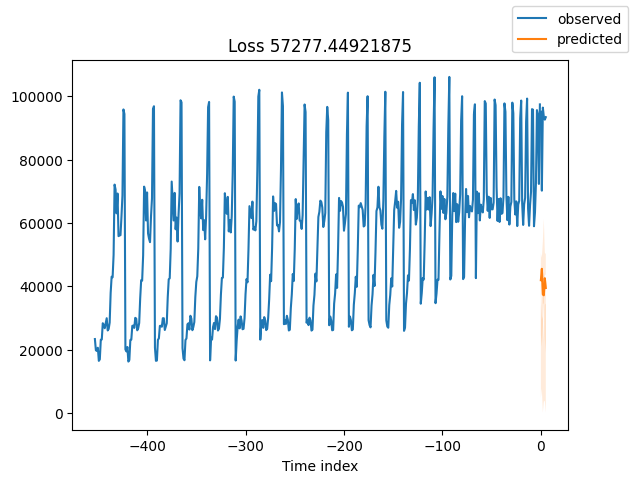

In [49]:
# fit network
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

In [38]:
# load the best model w.r.t. the validation loss
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

c:\Users\Sathmika\anaconda3\envs\tft\Lib\site-packages\lightning\pytorch\utilities\parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
c:\Users\Sathmika\anaconda3\envs\tft\Lib\site-packages\lightning\pytorch\utilities\parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


In [51]:
# compute the mean absolute error on validation set
actuals = torch.cat([y[0] for _, y in iter(val_dataloader)])
val_prediction_results = best_tft.predict(val_dataloader)
print(f"Validation MAE: {(actuals - val_prediction_results.cpu().numpy()).abs().mean()}")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Validation MAE: 0.12244067341089249


C:\Users\Sathmika\AppData\Local\Temp\ipykernel_20880\493137810.py:4: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  print(f"Validation MAE: {(actuals - val_prediction_results.cpu().numpy()).abs().mean()}")


In [52]:
# raw predictions are a dictionary from which all kind of information including quantiles can be extracted
val_prediction_results = best_tft.predict(val_dataloader, mode="raw", return_x=True)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


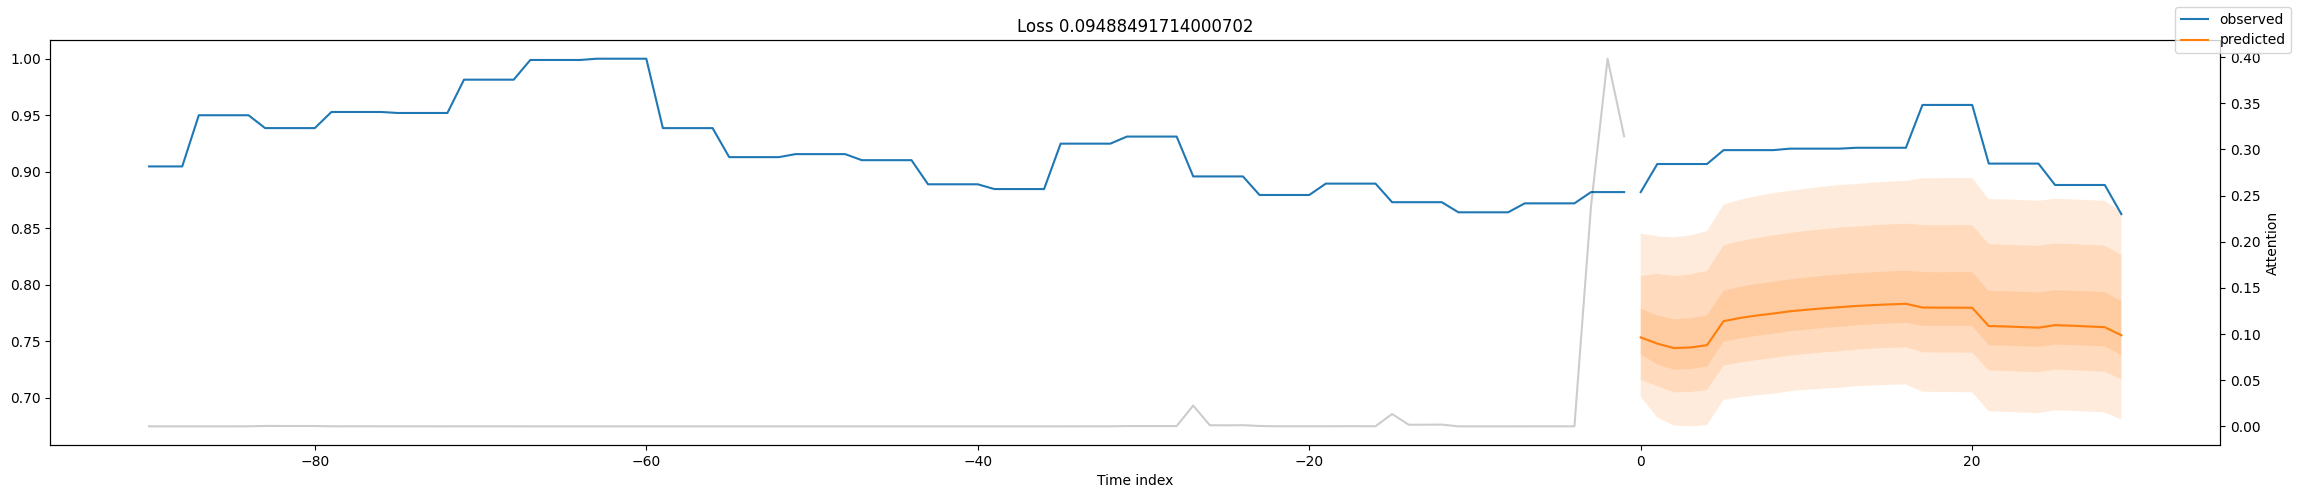

In [53]:
# Plot actuals vs prediction and attention
# for idx in range(val_predictions.prediction.shape[0]):
for idx in range(1):
    fig, ax = plt.subplots(figsize=(23,5))
    best_tft.plot_prediction(val_prediction_results.x, # network input
                            val_prediction_results.output, # network output
                            idx=idx,
                            add_loss_to_title=True,
                            ax=ax)